In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the Excel file
TX = pd.read_excel('data/TX_pattern.xlsx', header=None)
RX = pd.read_excel('data/RX_pattern.xlsx', header=None)
OMNI = pd.read_excel('data/OMNI_pattern.xlsx', header=None)

In [3]:
# Convert the DataFrame to a NumPy array
TX_pattern = TX.to_numpy()
RX_pattern = RX.to_numpy()
OMNI_pattern = OMNI.to_numpy()

In [4]:
print(TX_pattern.shape)
print(RX_pattern.shape)
print(OMNI_pattern.shape)

(360, 360)
(360, 360)
(360, 360)


In [5]:
# TX vertical shift
TX_vertical1 = TX_pattern[-90:, :]
TX_vertical2 = TX_pattern[:-90, :]
TX_pattern = np.vstack((TX_vertical1, TX_vertical2))

# RX vertical shift
RX_vertical1 = RX_pattern[-90:, :]
RX_vertical2 = RX_pattern[:-90, :]
RX_pattern = np.vstack((RX_vertical1, RX_vertical2))

# RX horizontal shift
RX_horizontal1 = RX_pattern[:,-180:]
RX_horizontal2 = RX_pattern[:,:-180]
RX_pattern = np.hstack((RX_horizontal1, RX_horizontal2))

# OMNI vertical shift
OMNI_vertical1 = OMNI_pattern[-270:, :]
OMNI_vertical2 = OMNI_pattern[:-270, :]
OMNI_pattern = np.vstack((OMNI_vertical1, OMNI_vertical2))

In [6]:
np.save('data/TX_pattern.npy', TX_pattern)
np.save('data/RX_pattern.npy', RX_pattern)
np.save('data/OMNI_pattern.npy', OMNI_pattern)

In [7]:
RX_pattern = np.load('data/RX_pattern.npy')
TX_pattern = np.load('data/TX_pattern.npy')
OMNI_pattern = np.load('data/OMNI_pattern.npy')

In [8]:
angles = np.linspace(0, 359, num=360)
angles = angles*np.pi/180

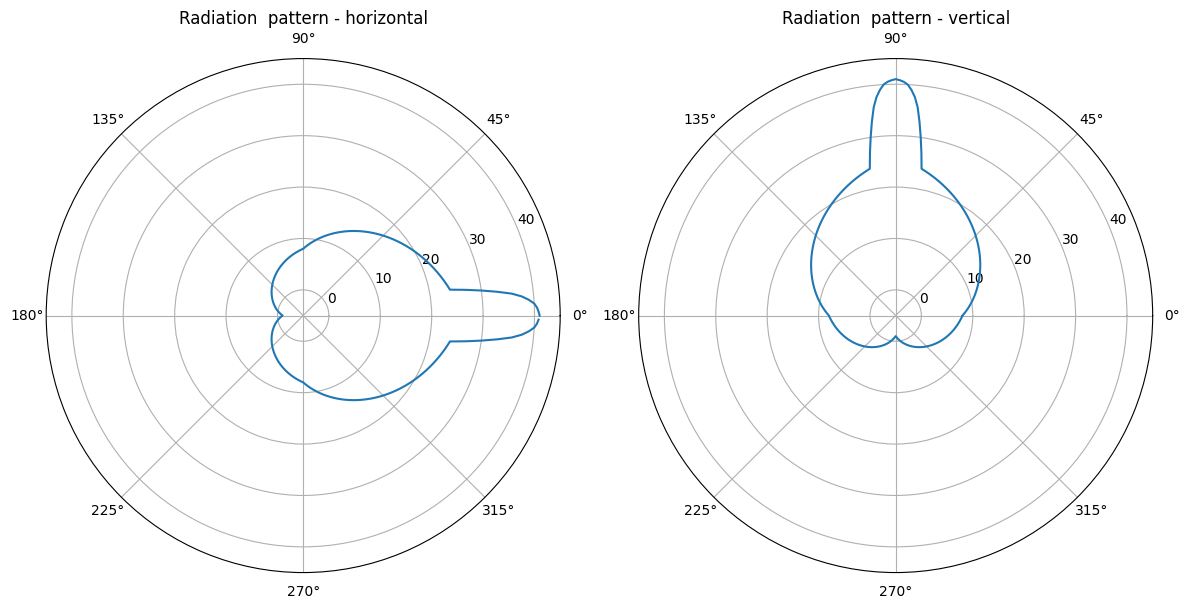

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 6))

# Plot on the first subplot
ax1.plot(angles, TX_pattern[90, :])
ax1.set_ylim(-5, 45)
ax1.set_title("Radiation  pattern - horizontal")
ax1.grid(True)

# Plot on the second subplot
ax2.plot(angles, TX_pattern[:, 0])
ax2.set_ylim(-5, 45)
ax2.set_title("Radiation  pattern - vertical")
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

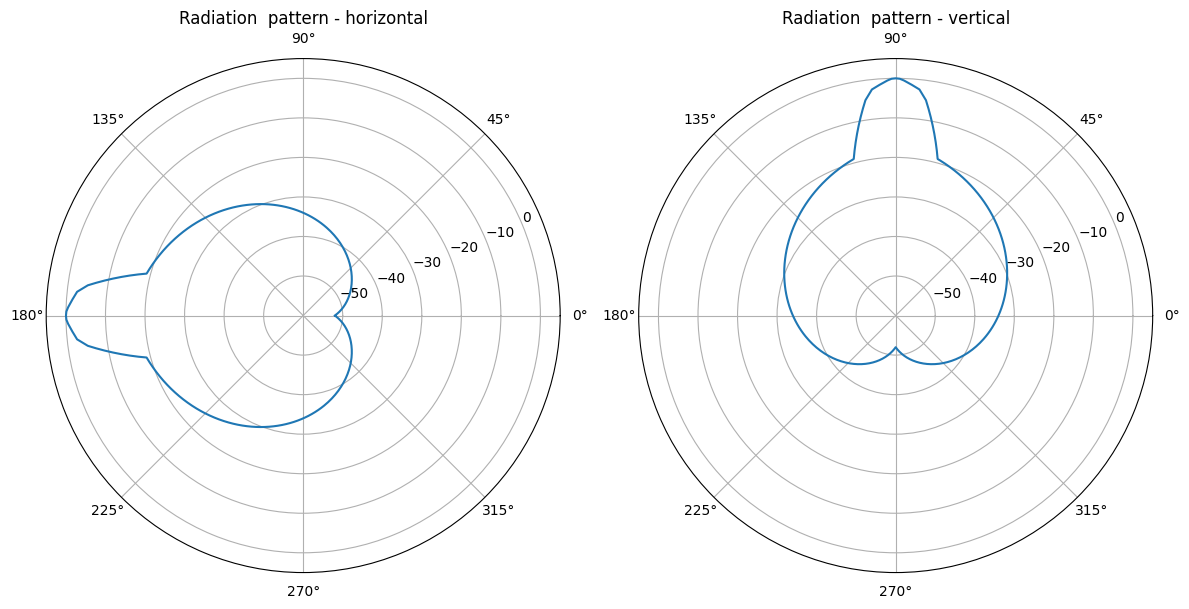

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 6))

# Plot on the first subplot
ax1.plot(angles, RX_pattern[90, :])
ax1.set_ylim(-60, 5)
ax1.set_title("Radiation  pattern - horizontal")
ax1.grid(True)

# Plot on the second subplot
ax2.plot(angles, RX_pattern[:, 180])
ax2.set_ylim(-60, 5)
ax2.set_title("Radiation  pattern - vertical")
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

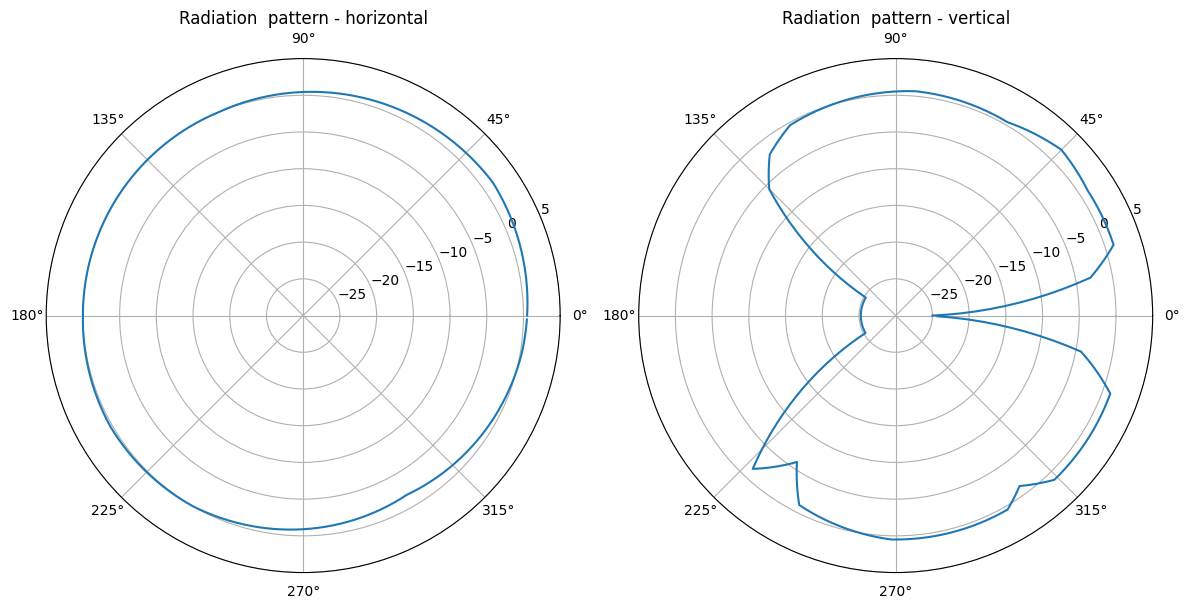

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 6))

# Plot on the first subplot
ax1.plot(angles, OMNI_pattern[270, :])
ax1.set_ylim(-30, 5)
ax1.set_title("Radiation  pattern - horizontal")
ax1.grid(True)

# Plot on the second subplot
ax2.plot(angles, OMNI_pattern[:, 0])
ax2.set_ylim(-30, 5)
ax2.set_title("Radiation  pattern - vertical")
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()